<h1 style="font-family: Georgia; font-size:3em;color:#2462C0; font-style:bold">
Predicting Employee Turnover</h1><br>

 <h2 style="font-family: Georgia; font-size:2em;color:purple; font-style:bold">
Introduction</h2><br>
**Employee turnover** refers to the percentage of workers who leave an organization and are replaced by new employees. It is very costly for organizations, where costs include but not limited to: separation, vacancy, recruitment, training and replacement. On average, organizations invest between four weeks and three months training new employees. This investment would be a loss for the company if the new employee decided to leave the first year. Furthermore, organizations such as consulting firms would suffer from deterioration in customer satisfaction due to regular changes in Account Reps and/or consultants that would lead to loss of businesses with clients.

In this notebook, we'll work on simulated HR data from Kaggle.To build a classifier that helps us predict what kind of employees will be more likely to leave given some attributes. Such classifier would help an organization predict employee turnover and be pro-active in helping to solve such costly matter. 

The data has 14,999 examples (samples). Below are the features and the definitions of each one:
- satisfaction_level: Level of satisfaction {0-1}.
- last_evaluationTime: Time since last performance evaluation (in years).
- number_project: Number of projects completed while at work.
- average_montly_hours: Average monthly hours at workplace.
- time_spend_company: Number of years spent in the company.
- Work_accident: Whether the employee had a workplace accident.
- left: Whether the employee left the workplace or not {0, 1}.
- promotion_last_5years: Whether the employee was promoted in the last five years.
- sales: Department the employee works for.
- salary: Relative level of salary {low, medium, high}


In [1]:
# Importing the neccessary librairies
import os

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
sns.set_context("notebook")
plt.style.use("fivethirtyeight")


 <h2 style="font-family: Georgia; font-size:2em;color:purple; font-style:bold">
Data Exploration </h2><br>
Let's take a look at the data (check if there are missing values and the data type of each features):

 <h2 style="font-family: Georgia; font-size:1em;color:blue; font-style:italic">
Number of Employees per department?</h2><br>


In [2]:
# Load the data
df = pd.read_csv("C:/Users/RAGHAVENDRA/Desktop/Predictive-HR/HR_comma_sep.csv")

# Check both the datatypes and if there is missing values
print("\033[1m" + "\033[94m" + "Data types:\n" + 11 * "-")
print("\033[30m" + "{}\n".format(df.dtypes))
print("\033[1m" + "\033[94m" + "Sum of null values in each column:\n" + 35 * "-")
print("\033[30m" + "{}".format(df.isnull().sum()))
df.head()
df.describe()

Data types:
-----------
satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

Sum of null values in each column:
-----------------------------------
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


This table describe the characteristics of each features. We can see different statistical measures of central tendency and variation. For example we can see that 
1. The **attrition rate(left)** is equal to ~ **24%**
2. The **satisfaction level** is around **62%**  
3. The **performance average(last_evaluation)** is around **71%**.
4. The ** average monthly hours worked** is around **200hrs**

We see that on average people work on 3 to 4 projects a year and about 200 hours per months.



 <h2 style="font-family: Georgia; font-size:1em;color:blue; font-style:italic">
Different Departments in the Dataset</h2><br>


In [4]:
np.unique(df.sales)

array(['IT', 'RandD', 'accounting', 'hr', 'management', 'marketing',
       'product_mng', 'sales', 'support', 'technical'], dtype=object)

 <h2 style="font-family: Georgia; font-size:1em;color:blue; font-style:italic">
How many employees left their job?</h2><br>


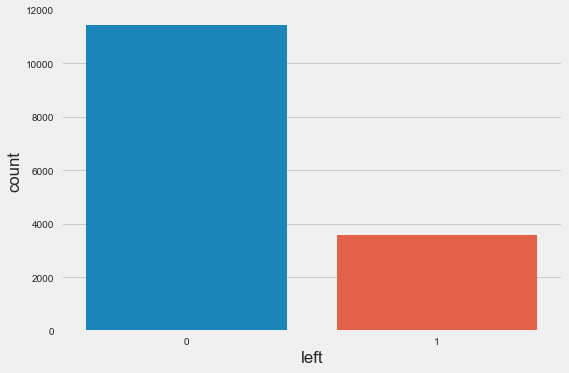

In [9]:
sns.countplot(df.left)

- Using the regression plot and  KDE (Kernel Density Estimate) below. 
- Clearly shows that **Unsatisfaction** of a worker has a influence on their **leaving**.

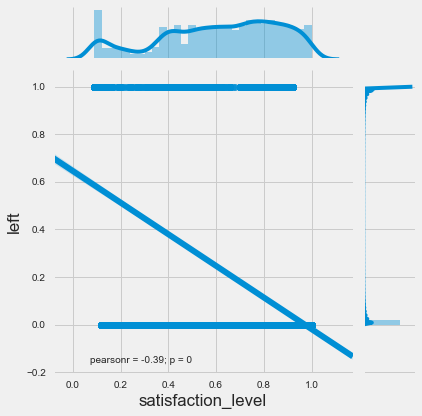

In [10]:
sns.jointplot(x='satisfaction_level', y='left', data=df, kind='reg')

 <h2 style="font-family: Georgia; font-size:1em;color:blue; font-style:italic">
Number of Employees per department?</h2><br>


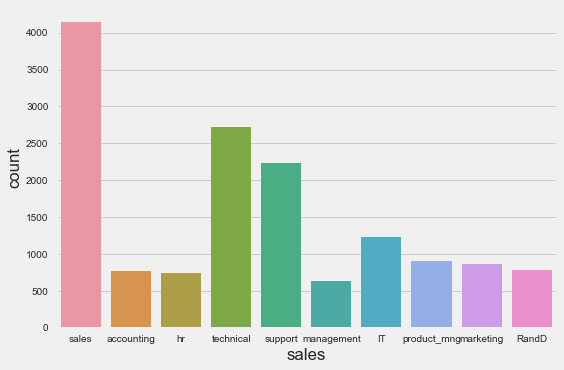

In [12]:
sns.countplot(x='sales', data=df)

 <h2 style="font-family: Georgia; font-size:1em;color:blue; font-style:italic">
Salary by Department?</h2><br>


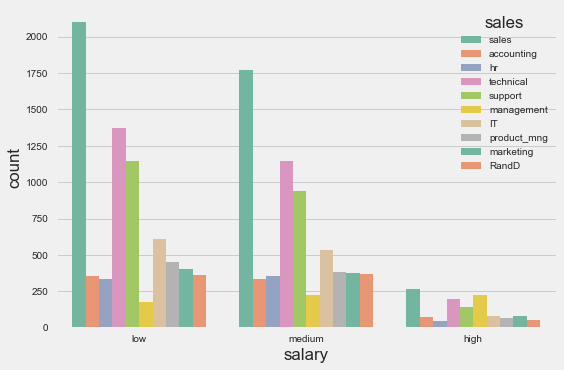

In [16]:
sns.countplot(x='salary', hue='sales', data=df, palette= 'Set2')

Conversion of **Salary** to numeric for comparison

Convert **salary** into *ordinal categorical* feature since there is intrinsic order between: low, medium and high.

In [18]:
df.salary = df.salary.astype('category').cat.reorder_categories(['low', 'medium', 'high'])
salary_numeric = pd.DataFrame(df.salary.cat.codes)
salary_numeric.columns = ['salary']
df = df.drop(['salary'], 1).join(salary_numeric)

In [19]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,0
1,0.80,0.86,5,262,6,0,1,0,sales,1
2,0.11,0.88,7,272,4,0,1,0,sales,1
3,0.72,0.87,5,223,5,0,1,0,sales,0
4,0.37,0.52,2,159,3,0,1,0,sales,0


 <h2 style="font-family: Georgia; font-size:1em;color:blue; font-style:italic">
Comparison of salary of those who left vs those who stayed?</h2><br>
-- Shows Management Department Stayed compared to those who left


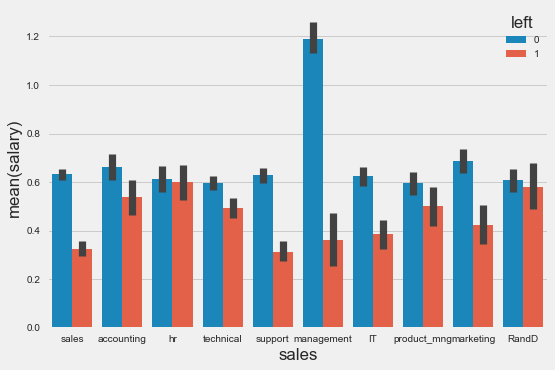

In [20]:
sns.barplot(x='sales',y='salary',hue='left', data=df)

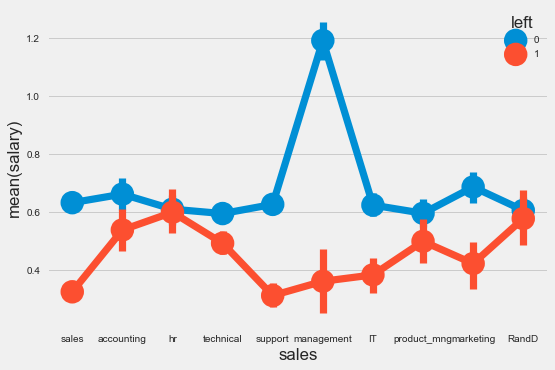

In [21]:
sns.pointplot(x='sales',y='salary',hue='left', data=df)

 <h2 style="font-family: Georgia; font-size:1em;color:blue; font-style:italic">
Comparison of salary of those who left vs those who stayed?</h2><br>
-- **People who left, on average, used to earn less. What does the correlation look like? -- Strong Correlation**


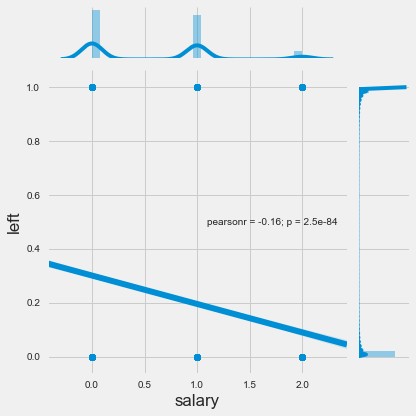

In [22]:
sns.jointplot(x='salary', y='left', data=df, kind='reg')

 <h2 style="font-family: Georgia; font-size:1em;color:blue; font-style:italic">
Salary Distribution?</h2><br>

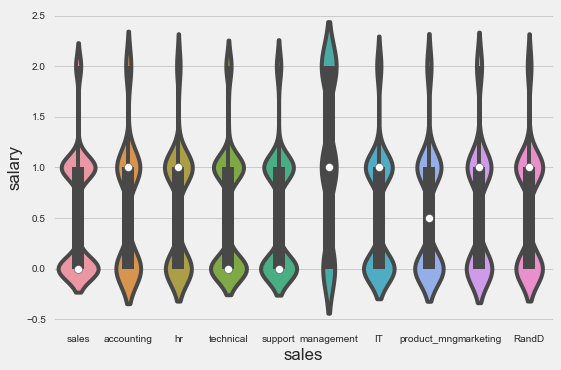

In [23]:
sns.violinplot(x='sales', y='salary', data=df, inner='box')

 <h2 style="font-family: Georgia; font-size:1em;color:blue; font-style:italic">
CORRELATION?</h2><br>
Correlation shows a linear relationship between **left** and **satisfaction_level**

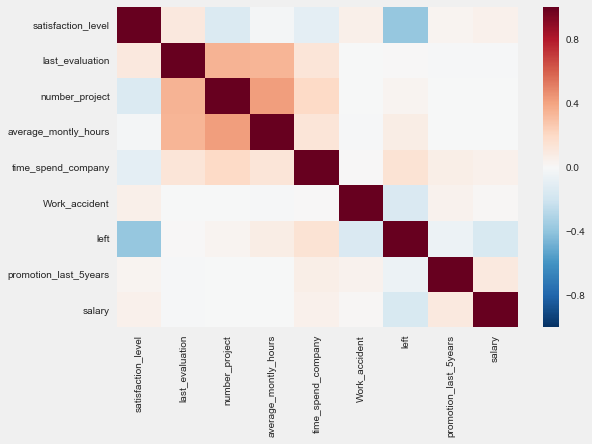

In [24]:
sns.heatmap(df.corr())

 <h2 style="font-family: Georgia; font-size:1em;color:blue; font-style:italic">
How many employees had accidents?</h2><br>


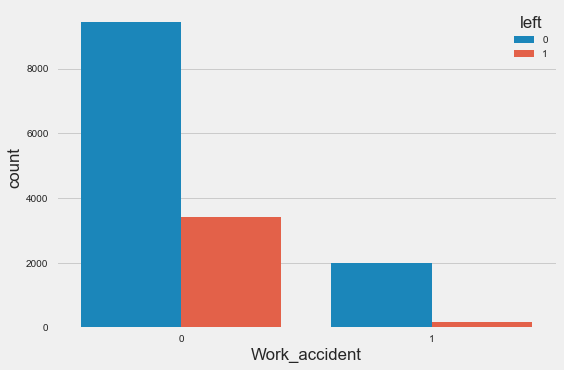

In [25]:
sns.countplot(x='Work_accident', hue='left', data=df)

 <h2 style="font-family: Georgia; font-size:2em;color:purple; font-style:bold">
Data Preprocessing?</h2><br>


Since there are no missing values, we do not have to do any imputation i.e fill any missing values with mean or drop the feature if not required. However, there are some data preprocessing needed:
1. Change **sales** feature name to **department**.
2. Create dummy features from **department** feature and drop the first one to avoid linear dependency where some learning algorithms may struggle with. (Also called as **One-Hot encoding**)

In [ ]:
# Rename sales feature into department
df = df.rename(columns={"sales": "department"})

# Map salary into integers
#salary_map = {"low": 0, "medium": 1, "high": 2}
#df["salary"] = df["salary"].map(salary_map)

# Create dummy variables for department feature
df = pd.get_dummies(df, columns=["department"], drop_first=True)
df.head()

In [27]:
df.columns[df.columns != "left"].shape

(17,)

In [29]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,1,0,0


The data is now ready to be used for modeling. The final number of features are now 17.